Questions to answer:

What programming languages are most popular?

What languages do people want to use next year?

How do languages relate to the age of the programmer?

# Import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# download and import data from 2022 Stack Overflow survey
# https://insights.stackoverflow.com/survey
!wget -N https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2022.zip
# If files with the same names already exist, they will be left as-is,
# thus one must be careful if these files are from a different dataset.
!unzip -n stack-overflow-developer-survey-2022.zip
    
df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')

--2023-06-29 20:21:58--  https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2022.zip
Resolving info.stackoverflowsolutions.com (info.stackoverflowsolutions.com)... 104.17.73.206, 104.17.70.206, 104.17.71.206, ...
Connecting to info.stackoverflowsolutions.com (info.stackoverflowsolutions.com)|104.17.73.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12089826 (12M) [application/zip]
Saving to: ‘stack-overflow-developer-survey-2022.zip’

stack-overflow-deve 100%[===================>]  11.53M  11.8MB/s    in 1.0s    

2023-06-29 20:21:59 (11.8 MB/s) - ‘stack-overflow-developer-survey-2022.zip’ saved [12089826/12089826]

Archive:  stack-overflow-developer-survey-2022.zip
  inflating: README_2022.txt         
  inflating: so_survey_2022.pdf      
  inflating: survey_results_public.csv  
  inflating: survey_results_schema.csv  


# Inspect data

In [51]:
# take a look at data
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [9]:
# take a look at schema
schema.head()

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR


In [7]:
# see what "qname" relates to language in schema
for qname in list(schema.qname):
    if 'lang' in qname.lower():
        print(qname)

Language


In [45]:
# verify question being asked
list(schema[schema['qname']=='Language']['question'])

['Which <b>programming, scripting, and markup languages</b> have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)']

In [52]:
# see what columns correspond to language in df
for col in list(df.columns):
    if 'lang' in col.lower():
        print(col)

LanguageHaveWorkedWith
LanguageWantToWorkWith


In [53]:
df['LanguageHaveWorkedWith']

0                                                      NaN
1                                    JavaScript;TypeScript
2                        C#;C++;HTML/CSS;JavaScript;Python
3                             C#;JavaScript;SQL;TypeScript
4              C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript
                               ...                        
73263    Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...
73264            Bash/Shell;HTML/CSS;JavaScript;Python;SQL
73265                   HTML/CSS;JavaScript;PHP;Python;SQL
73266                                        C#;Delphi;VBA
73267          C#;JavaScript;Lua;PowerShell;SQL;TypeScript
Name: LanguageHaveWorkedWith, Length: 73268, dtype: object

# Clean up data

In [89]:
# languages people worked with this year
lang_used_raw = df['LanguageHaveWorkedWith'].value_counts().reset_index()
lang_used_raw

,index,LanguageHaveWorkedWith
0,HTML/CSS;JavaScript;TypeScript,1250
1,Python,962
2,HTML/CSS;JavaScript,914
3,HTML/CSS;JavaScript;PHP;SQL,745
4,C#;HTML/CSS;JavaScript;SQL;TypeScript,570
...,...,...
25063,C#;Java;JavaScript;PHP;PowerShell;SQL;TypeScript,1
25064,C++;HTML/CSS;JavaScript;Python;Solidity;SQL,1
25065,Dart;Haskell;HTML/CSS;Java;R;SQL;TypeScript,1
25066,Bash/Shell;C;C#;Go;HTML/CSS;Java;JavaScript;Lu...,1


In [90]:
lang_used_raw.rename(columns={'index': 'language', 'LanguageHaveWorkedWith': 'count'},
                 inplace=True)
lang_used_raw

,language,count
0,HTML/CSS;JavaScript;TypeScript,1250
1,Python,962
2,HTML/CSS;JavaScript,914
3,HTML/CSS;JavaScript;PHP;SQL,745
4,C#;HTML/CSS;JavaScript;SQL;TypeScript,570
...,...,...
25063,C#;Java;JavaScript;PHP;PowerShell;SQL;TypeScript,1
25064,C++;HTML/CSS;JavaScript;Python;Solidity;SQL,1
25065,Dart;Haskell;HTML/CSS;Java;R;SQL;TypeScript,1
25066,Bash/Shell;C;C#;Go;HTML/CSS;Java;JavaScript;Lu...,1


In [91]:
# languages people want to work with next year
lang_want_raw = df['LanguageWantToWorkWith'].value_counts().reset_index()
lang_want_raw.rename(columns={'index': 'language', 'LanguageWantToWorkWith': 'count'},
                 inplace=True)

In [92]:
# parse out the set of languages in the survey
langs = set()

# iterate through all responses
for response in lang_used_raw.language:
    # responses have multiple languages separated by ";"
    for lang in response.split(';'):
        langs.add(lang)

langs

{'APL',
 'Assembly',
 'Bash/Shell',
 'C',
 'C#',
 'C++',
 'COBOL',
 'Clojure',
 'Crystal',
 'Dart',
 'Delphi',
 'Elixir',
 'Erlang',
 'F#',
 'Fortran',
 'Go',
 'Groovy',
 'HTML/CSS',
 'Haskell',
 'Java',
 'JavaScript',
 'Julia',
 'Kotlin',
 'LISP',
 'Lua',
 'MATLAB',
 'OCaml',
 'Objective-C',
 'PHP',
 'Perl',
 'PowerShell',
 'Python',
 'R',
 'Ruby',
 'Rust',
 'SAS',
 'SQL',
 'Scala',
 'Solidity',
 'Swift',
 'TypeScript',
 'VBA'}

In [116]:
# count up how many times each language is used by a respondent
lang_used_dict = {}
for lang in langs:
    lang_used_dict[lang] = 0
    for response in lang_used_raw.language:
        if lang in response:
            lang_used_dict[lang] += 1
# make pandas dataframe
lang_used = pd.DataFrame(pd.Series(lang_used_dict)).reset_index()
lang_used.columns = ['language', 'count']
lang_used.set_index('language', inplace=True)
lang_used.sort_values('count', ascending=False, inplace=True)

# count up how many times each language a respondent wants to use next year
lang_want_dict = {}
for lang in langs:
    lang_want_dict[lang] = 0
    for response in lang_want_raw.language:
        if lang in response:
            lang_want_dict[lang] += 1
# make pandas dataframe
lang_want = pd.DataFrame(pd.Series(lang_want_dict)).reset_index()
lang_want.columns = ['language', 'count']
lang_want.set_index('language', inplace=True)
lang_want.sort_values('count', ascending=False, inplace=True)

In [163]:
# trend in usage vs desirability
des_dict = {}
for lang in langs:
    des_dict[lang] = lang_want_dict[lang] - lang_used_dict[lang]
des = pd.DataFrame(pd.Series(des_dict)).reset_index()
des.columns = ['language', 'count']
des.set_index('language', inplace=True)
des.sort_values('count', ascending=False, inplace=True)

# Analyze results

Text(0, 0.5, 'Fraction who desire - fraction who use')

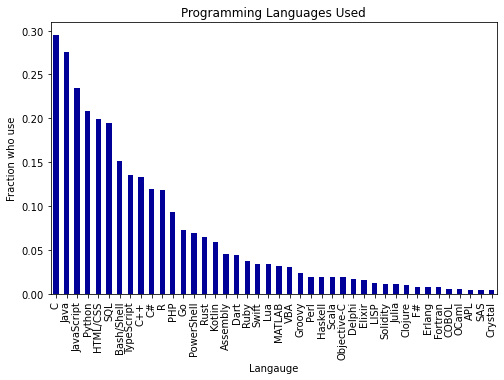

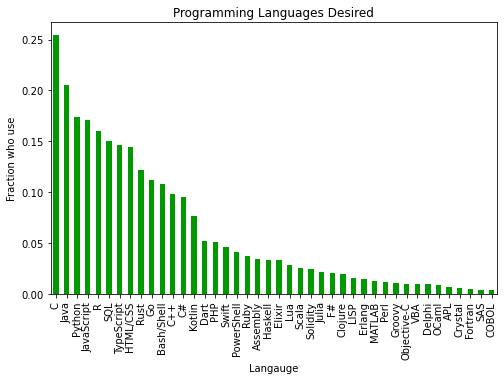

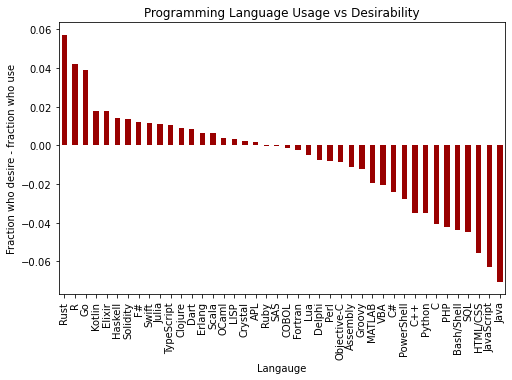

In [167]:
(lang_used/df.shape[0]).plot(kind='bar', legend=None, color="#000099", figsize=(8, 5))
plt.title('Programming Languages Used')
plt.xlabel('Langauge')
plt.ylabel('Fraction who use')

(lang_want/df.shape[0]).plot(kind='bar', legend=None, color="#009900", figsize=(8, 5))
plt.title('Programming Languages Desired')
plt.xlabel('Langauge')
plt.ylabel('Fraction who use')

(des/df.shape[0]).plot(kind='bar', legend=None, color="#990000", figsize=(8, 5))
plt.title('Programming Language Usage vs Desirability')
plt.xlabel('Langauge')
plt.ylabel('Fraction who desire - fraction who use')

# Inspect programmer's age vs language

In [196]:
# see what "qname" relates to happiness or mental health in schema
for qname in list(schema.qname):
    if 'age' in qname.lower():
        print(qname)

Language
Age
SOTeamsUsage


In [197]:
# verify question being asked
list(schema[schema['qname']=='Age']['question'])

['What is your age?']

In [199]:
# see what columns correspond to age in df
for col in list(df.columns):
    if 'age' in col.lower():
        print(col)

LanguageHaveWorkedWith
LanguageWantToWorkWith
Age


In [200]:
df['Age']

0                    NaN
1                    NaN
2        25-34 years old
3        35-44 years old
4        25-34 years old
              ...       
73263    25-34 years old
73264    25-34 years old
73265    55-64 years old
73266    55-64 years old
73267    25-34 years old
Name: Age, Length: 73268, dtype: object

# Clean up data on age

In [219]:
# only keep responses that have both language and age
age_raw = df[['LanguageHaveWorkedWith', 'Age']].dropna(axis=0, how='any')
age_raw

,LanguageHaveWorkedWith,Age
2,C#;C++;HTML/CSS;JavaScript;Python,25-34 years old
3,C#;JavaScript;SQL;TypeScript,35-44 years old
4,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,25-34 years old
5,C++;Lua,25-34 years old
6,C++;HTML/CSS;JavaScript;PHP;Python;TypeScript,Under 18 years old
...,...,...
73263,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,25-34 years old
73264,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,25-34 years old
73265,HTML/CSS;JavaScript;PHP;Python;SQL,55-64 years old
73266,C#;Delphi;VBA,55-64 years old


In [203]:
# see what options were submitted for age
age_set = set()
for response in age_raw['Age']:
    age_set.add(response)
age_set

{'18-24 years old',
 '25-34 years old',
 '35-44 years old',
 '45-54 years old',
 '55-64 years old',
 '65 years or older',
 'Prefer not to say',
 'Under 18 years old'}

In [222]:
# let's drop any responses that prefer not to say (this is no better than NaN)
age_raw = age_raw[age_raw['Age'] != 'Prefer not to say'].reset_index()
age_raw = age_raw[['LanguageHaveWorkedWith', 'Age']]
age_raw

,LanguageHaveWorkedWith,Age
0,C#;C++;HTML/CSS;JavaScript;Python,25-34 years old
1,C#;JavaScript;SQL;TypeScript,35-44 years old
2,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,25-34 years old
3,C++;Lua,25-34 years old
4,C++;HTML/CSS;JavaScript;PHP;Python;TypeScript,Under 18 years old
...,...,...
69698,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,25-34 years old
69699,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,25-34 years old
69700,HTML/CSS;JavaScript;PHP;Python;SQL,55-64 years old
69701,C#;Delphi;VBA,55-64 years old


In [245]:
# Let's assign a "normalized age" to each range from 10 - 70
agerange = {
    'Under 18 years old': 10,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

# now let's iterate through all responses, and count up how
# often each language is used by a particular age group, and
# use this to give each language and "age" rating between 10-70.
lang_age_dict = {}
lang_counts_dict = {}
# initialize dicts
for lang in langs:
    lang_age_dict[lang] = 0
    lang_counts_dict[lang] = 0
# iterate through data
for ii, row in age_raw.iterrows():
    for lang in langs:
        if lang in row['LanguageHaveWorkedWith']:
            lang_counts_dict[lang] += 1
            lang_age_dict[lang] += agerange[row['Age']]
# normalize language "ages" by counts
for lang in langs:
    lang_age_dict[lang] = lang_age_dict[lang]/lang_counts_dict[lang]

lang_age_dict

{'Elixir': 33.355614973262036,
 'Objective-C': 34.13917216556688,
 'F#': 32.775453277545324,
 'SAS': 33.0188679245283,
 'Lua': 26.82195738533767,
 'HTML/CSS': 29.901700733343734,
 'Fortran': 38.27697262479871,
 'Delphi': 46.17256637168141,
 'Rust': 27.62095531587057,
 'Assembly': 28.122848821816255,
 'APL': 33.65145228215768,
 'Python': 29.130018834643785,
 'Kotlin': 29.265095958807926,
 'COBOL': 41.286031042128606,
 'C++': 28.39374601148692,
 'Java': 30.401960411838456,
 'Haskell': 27.21216041397154,
 'C': 30.587848377215238,
 'SQL': 32.13007332140177,
 'OCaml': 28.57843137254902,
 'Groovy': 34.120190229139645,
 'Perl': 39.040752351097176,
 'C#': 31.56641283794143,
 'Bash/Shell': 31.885173128144423,
 'TypeScript': 30.269784172661872,
 'Swift': 31.86694021101993,
 'PowerShell': 32.33230623370467,
 'R': 30.092389602254933,
 'MATLAB': 28.45508563439357,
 'Ruby': 33.230914677381236,
 'Erlang': 33.649517684887456,
 'VBA': 35.217111611450626,
 'LISP': 33.00330033003301,
 'JavaScript': 30.39

In [248]:
lang_age = pd.DataFrame(pd.Series(lang_age_dict)).reset_index()
lang_age.columns = ['language', 'age']
lang_age.set_index('language', inplace=True)
lang_age.sort_values('age', ascending=True, inplace=True)

In [251]:
from math import sqrt

# Now let's get the standard deviation
lang_age_stdev_dict = {}
# initialize dict
for lang in langs:
    lang_age_stdev_dict[lang] = 0
# iterate through data
for ii, row in age_raw.iterrows():
    for lang in langs:
        if lang in row['LanguageHaveWorkedWith']:
            # calculate square difference for now, we'll convert to stdev later
            lang_age_stdev_dict[lang] += \
                (agerange[row['Age']] - lang_age_dict[lang])**2
# normalize and take square root to get stdev
for lang in langs:
    lang_age_stdev_dict[lang] = sqrt(lang_age_stdev_dict[lang]/lang_counts_dict[lang])

lang_age_stdev_dict

{'Elixir': 10.391880727260865,
 'Objective-C': 11.336583418730283,
 'F#': 11.902488985140936,
 'SAS': 12.375402514571025,
 'Lua': 12.156931376589919,
 'HTML/CSS': 11.149919551570095,
 'Fortran': 15.092647894409673,
 'Delphi': 12.836492144736212,
 'Rust': 10.668470532093705,
 'Assembly': 13.202873121286089,
 'APL': 15.724115526610628,
 'Python': 11.230975853505845,
 'Kotlin': 10.050881646412057,
 'COBOL': 15.305760403922214,
 'C++': 12.115880045340297,
 'Java': 10.964031843127621,
 'Haskell': 10.976996156558451,
 'C': 11.526490120294268,
 'SQL': 11.153031036941364,
 'OCaml': 11.75479566257193,
 'Groovy': 10.376288008669993,
 'Perl': 13.183830485402279,
 'C#': 11.730019981206366,
 'Bash/Shell': 11.291182845670981,
 'TypeScript': 9.826859989784825,
 'Swift': 11.67917645294093,
 'PowerShell': 11.827051346613008,
 'R': 10.849780660946328,
 'MATLAB': 10.260014902697389,
 'Ruby': 10.305352141514692,
 'Erlang': 10.908534879070013,
 'VBA': 13.063647168533697,
 'LISP': 14.021082275763465,
 'Java

In [252]:
lang_age_stdev = pd.DataFrame(pd.Series(lang_age_stdev_dict)).reset_index()
lang_age_stdev.columns = ['language', 'age']
lang_age_stdev.set_index('language', inplace=True)
lang_age_stdev.sort_values('age', ascending=True, inplace=True)

# Analyze age data

(-0.5, 41.5, 25.0, 50.0)

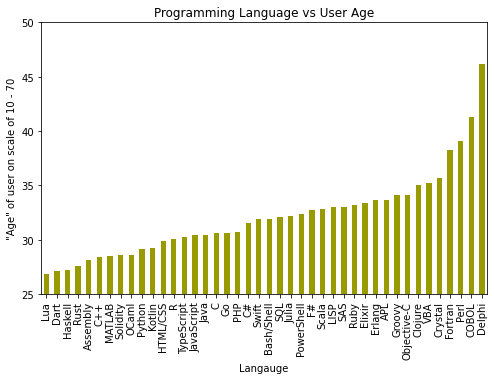

In [249]:
(lang_age).plot(kind='bar', legend=None, color="#999900", figsize=(8, 5))
plt.title('Programming Language vs User Age')
plt.xlabel('Langauge')
plt.ylabel('"Age" of user on scale of 10 - 70')
plt.axis([None, None, 25, 50])

(-0.5, 41.5, 9.0, 16.0)

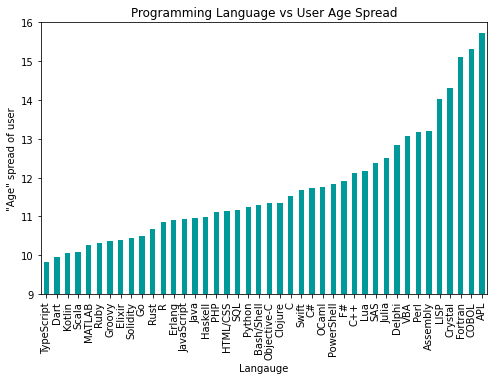

In [258]:
(lang_age_stdev).plot(kind='bar', legend=None, color="#009999", figsize=(8, 5))
plt.title('Programming Language vs User Age Spread')
plt.xlabel('Langauge')
plt.ylabel('"Age" spread of user')
plt.axis([None, None, 9, 16])